In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv('data/titanic.csv')
titanic['age'] = titanic['age'].replace(['?'],[None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'],[None]).astype('float')

# wranggling

<AxesSubplot:xlabel='pclass'>

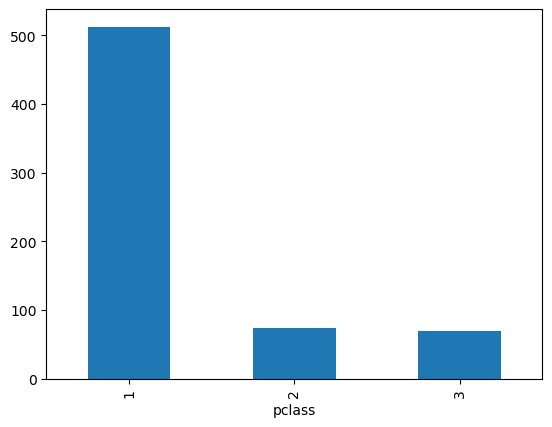

In [2]:
titanic.groupby('pclass')['fare'].max().plot(kind='bar')

## upper : 대문자
## lower : 소문자
## str[0] : 첫번째 문자

In [3]:
titanic['name'].str.upper()

0                         ALLEN, MISS. ELISABETH WALTON
1                        ALLISON, MASTER. HUDSON TREVOR
2                          ALLISON, MISS. HELEN LORAINE
3                  ALLISON, MR. HUDSON JOSHUA CREIGHTON
4       ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)
                             ...                       
1304                               ZABOUR, MISS. HILENI
1305                              ZABOUR, MISS. THAMINE
1306                          ZAKARIAN, MR. MAPRIEDEDER
1307                                ZAKARIAN, MR. ORTIN
1308                                 ZIMMERMAN, MR. LEO
Name: name, Length: 1309, dtype: object

In [4]:
titanic['lower_name'] = titanic['name'].str.lower()
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO","allen, miss. elisabeth walton"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","allison, master. hudson trevor"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, miss. helen loraine"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","allison, mr. hudson joshua creighton"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, mrs. hudson j c (bessie waldo daniels)"


In [5]:
titanic['deck'] = titanic['cabin'].str[0]
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,lower_name,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO","allen, miss. elisabeth walton",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON","allison, master. hudson trevor",C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, miss. helen loraine",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON","allison, mr. hudson joshua creighton",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON","allison, mrs. hudson j c (bessie waldo daniels)",C


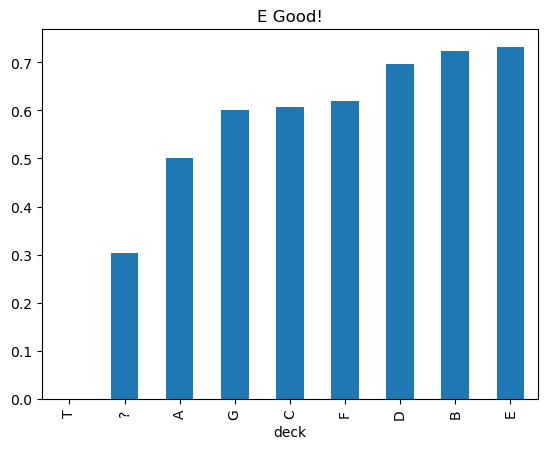

In [6]:
titanic.groupby('deck')['survived'].mean().sort_values().plot(kind='bar')
plt.title('E Good!')
plt.show()

In [7]:
titanic.groupby('deck').mean()

,pclass,survived,age,sibsp,parch,fare
deck,,,,,,
?,2.617357,0.302761,27.406654,0.503945,0.367850,19.132707
A,1.000000,0.500000,44.157895,0.181818,0.181818,41.244314
B,1.000000,0.723077,36.476190,0.446154,0.661538,122.383078
C,1.000000,0.606383,38.382752,0.680851,0.414894,107.926598
D,1.130435,0.695652,39.702381,0.413043,0.260870,53.007339
E,1.243902,0.731707,38.118421,0.341463,0.390244,54.564634
F,2.380952,0.619048,21.333333,0.428571,0.523810,18.079367
G,3.000000,0.600000,12.000000,0.600000,1.200000,14.205000
T,1.000000,0.000000,45.000000,0.000000,0.000000,35.500000


In [8]:
titanic.groupby('deck')['survived'].mean().sort_values()

deck
T    0.000000
?    0.302761
A    0.500000
G    0.600000
C    0.606383
F    0.619048
D    0.695652
B    0.723077
E    0.731707
Name: survived, dtype: float64

In [9]:
titanic[titanic['deck']=='T']['survived'].count()

1

In [10]:
titanic.groupby('deck').size().sort_values()

deck
T       1
G       5
F      21
A      22
E      41
D      46
B      65
C      94
?    1014
dtype: int64

In [11]:
ufos = pd.read_csv('data/nuforc_reports.csv')
ufos.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [12]:
ufos['duration']

0          5 seconds
1        3-5 seconds
2                NaN
3         10 seconds
4          2 minutes
            ...     
88120      3 minutes
88121     20 seconds
88122     20 seconds
88123      2 minutes
88124      3 minutes
Name: duration, Length: 88125, dtype: object

In [129]:
ufos['duration'].str[0:3]

0        5 s
1        3-5
2        NaN
3        10 
4        2 m
        ... 
88120    3 m
88121    20 
88122    20 
88123    2 m
88124    3 m
Name: duration, Length: 88125, dtype: object

In [355]:
ufos['duration'].str.replace('seconds|minutes','',regex=True)
# 논리연산자 |를 사용해서 공백으로 replace해준다.

0          5 
1        3-5 
2         NaN
3         10 
4          2 
         ... 
88120      3 
88121     20 
88122     20 
88123      2 
88124      3 
Name: duration, Length: 88125, dtype: object

In [356]:
ufos['duration'].str.replace('seconds','s').str.replace('minutes','m')

0          5 s
1        3-5 s
2          NaN
3         10 s
4          2 m
         ...  
88120      3 m
88121     20 s
88122     20 s
88123      2 m
88124      3 m
Name: duration, Length: 88125, dtype: object

In [357]:
def abbrv(reo):
    return reo.group()[0]
    
ufos['duration'].str.replace('seconds|minutes|hours',abbrv, regex=True)

0          5 s
1        3-5 s
2          NaN
3         10 s
4          2 m
         ...  
88120      3 m
88121     20 s
88122     20 s
88123      2 m
88124      3 m
Name: duration, Length: 88125, dtype: object

In [358]:
ufos['duration'].str[-7:].replace('seconds','True').str[-7:].replace('minutes','False')

0         True
1         True
2          NaN
3         True
4        False
         ...  
88120    False
88121     True
88122     True
88123    False
88124    False
Name: duration, Length: 88125, dtype: object

In [359]:
ufos['duration'].str.contains('seconds')

0         True
1         True
2          NaN
3         True
4        False
         ...  
88120    False
88121     True
88122     True
88123    False
88124    False
Name: duration, Length: 88125, dtype: object

In [360]:
# 문제4번
titanic['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [361]:
titanic['age']*365

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [362]:
def a(b):
    return b*365
titanic['age'].agg(a)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [363]:
titanic['age'].apply(a)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [466]:
a = '2'

if a == '2' :
    print('infant')
else:
    print('child')

infant


In [467]:
titanic['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64